# REAL RACING 3 VEHICLES - OUTCOME 2 - Revision 1

### **Welcome to my 2nd part of data analyses for Real Racing 3 Vehicles!**

_This part has been revised for **game version 9.0** to make all these analyses up-to-date._

As always, let's import all necessary modules and load our vehicle dataset first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Important:** It seems that GitHub causes some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed before the analyses begin.

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v9_0.csv')
for i in range(len(rr3_df)):
    if rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Before I start, let me check the first few lines of the vehicle dataset...

In [3]:
rr3_df.head()

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
0,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990.0,True,False,False
1,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997.0,True,False,False
2,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332.0,True,False,False
3,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415.0,True,False,False
4,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665.0,True,True,False


All right, everything is loaded properly; I assure that there seems to be no problem here.

**To summarize what I did in the 1st part:** I had performed many data analyses such as _selecting some vehicles one by one,_ _finding the minimum and maximum values in terms of their characteristics,_ _discussions on servicing time,_ etc. 

_**Now, I would like to move on to more advanced analysis in order to gain more insights.**_

First of all, let's see how many manufacturers have participated in this racing game:

In [4]:
len(rr3_df['Manufacturer'].value_counts())

41

Whoa! **41**, eh? There are many many manufacturers than I expected! Well, however, should I inspect the manufacturer names in advance, there are **at least one or two** of them that do not seem to be a car manufacturer at all. Let me investigate the unique names in the corresponding column:

In [5]:
rr3_df['Manufacturer'].unique()

array(['Acura', 'Alfa Romeo', 'Ariel', 'Aston Martin', 'Audi', 'Bentley',
       'BMW', 'Brabham', 'Bugatti', 'Cadillac', 'Caterham', 'Chevrolet',
       'Dodge', 'Ferrari', 'Ford', 'Formula 1', 'Formula E', 'Hennessey',
       'Holden', 'Honda', 'Hyundai', 'Jaguar', 'Koenigsegg', 'KTM',
       'Lamborghini', 'Lancia', 'Lexus', 'Lotus', 'Maserati', 'Mazda',
       'McLaren', 'Mercedes-Benz', 'Mercedes-AMG', 'Nissan', 'Pagani',
       'Porsche', 'Renault', 'Shelby', 'Spada', 'SRT', 'Toyota'],
      dtype=object)

Ah yes! As you see from the manufacturer names above, **Formula 1** and **Formula E** should not be classified as individual manufacturers! Of course, I have to clarify that in order to not disorganize those related vehicles, they were all branded under their motorsport names.

Also, if you've ever played the game and inspected the vehicles from the corresponding roster menu, you'll realize that **the game grouped them together** accordingly. 

Moreover, **Mercedes-Benz** and **Mercedes-AMG** have been appeared to be _two different manufacturers_ at all! Despite this distinction, should I consider them as one whole manufacturer? Yeah, I think so.

In [6]:
rr3_df['Manufacturer'].replace('Mercedes-Benz', 'Mercedes', inplace=True)
rr3_df['Manufacturer'].replace('Mercedes-AMG', 'Mercedes', inplace=True)

And below, these are the Mercedes vehicles available to drive in the game:

In [7]:
rr3_df[rr3_df['Manufacturer'] == 'Mercedes'].loc[:, ['Manufacturer', 'Model']]

,Manufacturer,Model
251,Mercedes,190E 2.5-16 Evolution II
252,Mercedes,A 45
253,Mercedes,SLS AMG
254,Mercedes,SL 65 AMG Black Series
255,Mercedes,SLS AMG GT3
256,Mercedes,SLR McLaren 722
257,Mercedes,GT3
258,Mercedes,CLK-LM
259,Mercedes,GT4
260,Mercedes,C 63 Touring Car


Yep, this should do the trick! With these discussions in mind, we now have **38** different manufacturers.

At this point, we should be aware that some manufacturers are represented with just one vehicle, while some are represented by having already more than 10 vehicles! So, the question is what are **the first ten** manufacturers that contain the most vehicles in RR3?

_For the proper result, Formula 1 and Formula E are ignored at all..._

In [8]:
rr3_df['Manufacturer'].value_counts().drop(['Formula 1', 'Formula E']).head(10)

Porsche         42
Ferrari         27
Nissan          24
Ford            23
Chevrolet       23
BMW             17
Lamborghini     17
McLaren         16
Aston Martin    15
Mercedes        11
Name: Manufacturer, dtype: int64

Hmmm, from this outcome, Real Racing 3 favors **Porsche** the most! With **over 40 vehicles**!

Then these manufacturers come after: _Ferrari,_ _Nissan,_ _Chevrolet,_ _Ford,_ _BMW,_ _Lamborghini,_ _McLaren,_ _Aston Martin,_ and _Mercedes_ (thanks to our combination as one).

With the latest update (version 9.0), where **Chevrolet Corvette C6.R GT2** and **Aston Martin Valkyrie** were added, now _Chevrolet_ has 23 vehicles in total, sharing the **4th** place with _Ford_. _Aston Martin_, on the other hand, is still in the **9th** place.

In a different aspect, I'd like to see the names of manufacturers only having **one** vehicle in the game:

In [9]:
manu_one_vehicle = (rr3_df['Manufacturer'].value_counts() == 1).values
print(rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle])

['Hennessey' 'SRT' 'Lancia' 'Cadillac' 'Brabham' 'Caterham' 'KTM']


All right, 7 manufacturers with only **one** vehicle available for purchase! I remember that **Brabham** is the newest one among all. Well, what are the details about these vehicles?

In [10]:
manu_names_one_v = rr3_df['Manufacturer'].value_counts().index.values[manu_one_vehicle]
manu_values = rr3_df['Manufacturer'].values
manu_names_one_v_indexes = []
for i in range(manu_values.size):
    if manu_values[i] in manu_names_one_v:
        manu_names_one_v_indexes.append(i)
rr3_df.loc[manu_names_one_v_indexes, 
           ['Manufacturer','Model','PR','Top Speed','Acceleration','Braking','Grip','Price','In Main Career']]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Price,In Main Career
50,Brabham,BT62,68.9,319,2.88,27.4,1.55,800 Gold,False
56,Cadillac,DPI-V.R,78.5,325,2.76,26.2,1.75,850 Gold,False
57,Caterham,Seven 620 R,49.1,249,2.70,32.0,1.18,378500 Rdollar,True
180,Hennessey,Venom GT,80.5,435,2.70,25.9,1.68,950 Gold,False
203,KTM,X-Bow R,46.6,232,3.80,32.0,1.50,115 Gold,True
221,Lancia,LC2,82.5,385,2.80,28.3,1.80,900 Gold,False
340,SRT,Viper GTS,42.4,332,3.50,32.3,1.06,176000 Rdollar,True


**There they are!** In the meantime, we realize that _Caterham Seven 620 R,_ _SRT Viper GTS,_ and _KTM X-Bow R_ can be purchased within the main career series at reasonable prices. The rest are much more expensive, ranging from **800 to 950 Gold**!

By the way, this game has **several vehicles discontinued** for sale! What could be those and why they are removed?

In [11]:
rr3_df[rr3_df['Availability'] == False].loc[:,['Manufacturer','Model','Price']]

,Manufacturer,Model,Price
62,Chevrolet,SS (NASCAR Academy),200000 Rdollar
68,Chevrolet,SS (Hendrick Motorsports - 2015),500 Gold
69,Chevrolet,SS (Stewart-Haas Racing - 2015),500 Gold
70,Chevrolet,SS (Stewart-Haas Racing - 2016),500 Gold
71,Chevrolet,SS (Hendrick Motorsports - 2016),500 Gold
72,Chevrolet,SS (Hendrick Motorsports - 2017),500 Gold
73,Chevrolet,Camaro ZL1 (2018),500 Gold
74,Chevrolet,Camaro ZL1 (2019),500 Gold
123,Ford,Fusion (NASCAR Academy),400000 Rdollar
124,Ford,Falcon FG X (2016),600 Gold


That's a long list! Anyway, these all are either from **NASCAR** or **Supercars** series!

In more details, _Ford Falcon FG X,_ _Holden Commodore VF,_ _Nissan Altima,_ all ranging from **2016 to 2018 models**, were raced under **Supercars** series. And, the others, you know, are from **NASCAR**. Due to limited licensing to these vehicles within the game, newcomers can no longer access them! But, you should consider yourself lucky if you already purchased at least one of them, because you can **still race with them** in their own motorsport series.

Keep in mind that, the **2020 Season NASCAR vehicles** (there are 7 in total) have also their own **expiry times**! We'd be better hurry in this version and in the following one for purchasing them to be able to continue racing before they disappear once and for all!

Then, this raises another question, though: In the current version, **how many vehicles can we see in the game right now?**

In [12]:
availability = {'available': 0, 'not available': 0}
for status in rr3_df['Availability'].values:
    if status == True:
        availability['available'] += 1
    else:
        availability['not available'] += 1
for k, v in availability.items():
    print("There are {} vehicles {} for sale.".format(v, k))

There are 319 vehicles available for sale.
There are 30 vehicles not available for sale.


So, in the above statements, there are total of **30** vehicles that are discontinued,as I said these were from **Supercars** and **NASCAR** in previous seasons. However, any player can access **319** different vehicles right now. Still a big number for a racing game, do you agree?

In terms of vehicle variations, could Real Racing 3 still compete with other popular racing games, such as _Gran Turismo Sport,_ _Project CARS 3,_ _Forza Motorsport 7,_ or _Forza Horizon 4?_ I'll leave that to you...

**OK, let's continue with another aspect:** Count the vehicles according to their **currency types** of their purchase, including the discontinued ones. As we know there are 3 different currencies: `R$`, `Gold`, `M$`

In [13]:
purchase_type = {'R$':0, 'Gold':0, 'M$':0, 'unspecified':0}
for val in rr3_df['Price'].values:
    if 'R$' in str(val):
        purchase_type['R$'] += 1
    elif 'Gold' in str(val):
        purchase_type['Gold'] += 1
    elif 'M$' in str(val):
        purchase_type['M$'] += 1
    else:
        purchase_type['unspecified'] += 1
print(purchase_type)

{'R$': 0, 'Gold': 214, 'M$': 0, 'unspecified': 135}


Oh, lots of vehicles (over 200) with purchase type `Gold`! And those with `M$` must be accessible from **Motorsport disciplines** only.

Let me remind you again which ones: _Formula 1,_ _Formula E,_ _GT3,_ _EuroMaster,_ _NASCAR,_ _Endurance GTE_.

In addition, only **82** vehicles can be bought with `R$`, significantly lower than `Gold`, to be honest.

Nonetheless, it is good to know that there are no _unspecified_ ones in the dataset.

_Plus, the percentage of vehicles with Gold purchase-type is..._

In [14]:
print("Percentage of vehicles with purchase type Gold: {:.5}".format(purchase_type['Gold']/rr3_df.shape[0] * 100))

Percentage of vehicles with purchase type Gold: 61.318


All right, now I want to make a **sub-dataset** that involves vehicles that are purchasable with `R$`; and get valuable numerical info about them:

_At the same time, it is convenient to reset the indexes of that subset..._

In [15]:
rr3_rdollar_df = rr3_df[rr3_df['Price'].str.contains('Rdollar')]
rr3_rdollar_df = rr3_rdollar_df.reset_index()
rr3_rdollar_df = rr3_rdollar_df.drop('index', axis=1)
round(rr3_rdollar_df.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,2.85,128.40,1145.27
std,20.29,45.40,1.14,3.64,0.21,1.19,82.16,482.74
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00
25%,19.65,265.00,3.23,30.50,0.94,2.00,45.00,688.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00
75%,50.45,330.00,4.57,33.50,1.20,3.00,178.75,1473.75
max,89.90,433.00,8.20,48.20,1.90,7.00,320.00,2165.00


This tells us a lot! Well, one thing is missing, **the numbers of purchase cost**. Since the corresponding column I used for separating this subset is actually an **"object"**, not a whole integer, then I need to add a new column to include only these numbers and therefore, this column could be probably considered as **"integer"**.

Let's print these analyses again:

In [16]:
rdollar_values = []
for val in rr3_rdollar_df['Price']:
    rdollar_values.append(int(val.split()[0]))
rr3_rdollar_df['Purchase Value'] = rdollar_values
rr3_rdollar_df.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,36.31,301.82,4.05,32.52,1.08,2.85,128.40,1145.27,556630.43
std,20.29,45.40,1.14,3.64,0.21,1.19,82.16,482.74,798846.05
min,0.10,204.00,2.57,25.60,0.72,1.00,1.00,285.00,22000.00
25%,19.65,265.00,3.23,30.50,0.94,2.00,45.00,688.00,85875.00
50%,39.35,311.00,3.70,31.85,1.02,3.00,130.00,1160.00,257500.00
75%,50.45,330.00,4.57,33.50,1.20,3.00,178.75,1473.75,590325.00
max,89.90,433.00,8.20,48.20,1.90,7.00,320.00,2165.00,4000000.00


Yeah, if you agree with me, it is worthwhile to have these purchase values in a separate column (the rightmost) as **integers** after the hassle of fetching and converting operations. 

As we expect, there's a huge difference between _min_ and _max_ values, thus **immensely high standard deviation** as expected! Plus, you would accept that by **rounding** these numbers above to lesser digits, they become easier to read!

By the way, w.r.t. `R$`, I wonder what the cheapest and the most expensive vehicles are...

In [17]:
rr3_rdollar_df[(rr3_rdollar_df['Purchase Value'] == min(rr3_rdollar_df['Purchase Value']))]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
43,Hyundai,Veloster Turbo,1.6,225,7.3,41.8,0.85,P,FF,2,22000 Rdollar,5,285.0,True,False,False,22000


In [18]:
rr3_rdollar_df[(rr3_rdollar_df['Purchase Value'] == max(rr3_rdollar_df['Purchase Value']))]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
7,Audi,R18 E-Tron Quattro (2014),89.9,377,2.57,25.6,1.9,R,M4(RHD),2,4000000 Rdollar,320,2165.0,True,False,True,4000000


Ah, it is unveiled that the cheapest one with `R$' is **Hyundai Veloster Turbo**, while, on the contrary, the most expensive one is **Audi R18 E-Tron Quattro (2014)**! The former can be raced in _Amateur_ career part, and the latter can only appear in _Endurance Series_ (both in Legend career part and Motorsports).

Now, I'd like to do everything the same as above for vehicles with **Gold**:

In [19]:
rr3_gold_df = rr3_df[rr3_df['Price'].str.contains('Gold')]
rr3_gold_df = rr3_gold_df.reset_index()
rr3_gold_df = rr3_gold_df.drop('index', axis=1)
gold_values = []
for val in rr3_gold_df['Price']:
    gold_values.append(int(val.split()[0]))
rr3_gold_df['Purchase Value'] = gold_values
rr3_gold_df.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,212.00,214.00
mean,52.08,316.00,3.58,30.74,1.35,1.89,178.34,1630.83,525.63
std,24.06,46.16,1.11,5.39,0.42,1.06,45.72,353.09,271.03
min,0.10,180.00,1.90,14.30,0.77,1.00,30.00,582.00,40.00
25%,40.28,290.00,2.80,28.08,1.06,1.00,180.00,1415.00,300.00
50%,49.00,319.00,3.40,29.90,1.30,2.00,180.00,1598.50,500.00
75%,70.22,340.00,4.00,31.92,1.53,2.00,180.00,1990.00,715.00
max,130.30,447.00,8.00,48.80,4.00,6.00,325.00,2192.00,1200.00


Again, this tells lots of valueable information! I'll leave the interpretation to you.

However, let me reveal **the cheapest** and **the most expensive** vehicles with purchase type `Gold`:

In [20]:
rr3_gold_df[rr3_gold_df['Purchase Value'].isin([min(rr3_gold_df['Purchase Value']), max(rr3_gold_df['Purchase Value'])])]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
143,McLaren,MP4-X,130.3,402,1.9,14.3,4.00,R,MR(MHD),2,1200 Gold,240,2117.0,True,True,False,1200
202,Renault,Clio Cup,5.7,238,5.8,36.3,0.99,S,FF,2,40 Gold,40,630.0,True,False,False,40


Here comes the most expensive vehicle with Gold: **McLaren MP4-X**. I'm not surprised with that as we encountered it previously somewhere in the 1st part of analyses.

On the other hand, **Renault Clio Cup** is the cheapest with Gold, that made me surprised though! You could drive this vehicle in some bonus career series within **Pro/AM** line.

Furthermore, **the same numerical analyses** with `M$` purchase-type vehicles, as there are adequate numbers of them up until this version:

In [21]:
rr3_mdollar_df = rr3_df[rr3_df['Price'].str.contains('Mdollar')]
rr3_mdollar_df = rr3_mdollar_df.reset_index()
rr3_mdollar_df = rr3_mdollar_df.drop('index', axis=1)
mdollar_values = []
for val in rr3_mdollar_df['Price']:
    mdollar_values.append(int(val.split()[0]))
rr3_mdollar_df['Purchase Value'] = mdollar_values
rr3_mdollar_df.describe().round(2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost,Purchase Value
count,53.00,53.00,53.00,53.00,53.00,53.00,53.0,53.0,53.00
mean,76.64,279.72,2.80,23.98,1.99,1.43,180.0,0.0,1979245.28
std,32.69,33.66,0.66,5.73,0.86,0.54,0.0,0.0,493655.32
min,33.40,224.00,2.01,16.20,1.05,0.00,180.0,0.0,0.00
25%,54.70,241.00,2.07,17.40,1.35,1.00,180.0,0.0,1950000.00
50%,63.60,293.00,3.00,27.40,1.62,1.00,180.0,0.0,2150000.00
75%,115.60,311.00,3.44,29.30,3.02,2.00,180.0,0.0,2150000.00
max,116.00,317.00,3.90,30.80,3.06,2.00,180.0,0.0,2500000.00


If you take a look at the table above, you'll recogize that **Service Time** for `M$` purchase-type vehicles always appear as **180 minutes**. Likewise, their **Service Cost** is always FREE.

Well, strangely, the **minimum purchase value** is zero. Is this an error or intentional?

In [22]:
rr3_mdollar_df[rr3_mdollar_df['Purchase Value'] == min(rr3_mdollar_df['Purchase Value'])]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career,Purchase Value
10,Formula 1,F1 Academy Car,110.3,306,2.15,18.3,3.0,R,MR,0,0 Mdollar,180,0.0,True,False,False,0


Ah, that's right! The **F1 Academy Car** is FREE to get; enabling you to jump into the Formula 1 action in no time, right?

And, I suppose there should exist **more than one vehicle** that are purchased with the maximum `M$` value...

In [23]:
rr3_mdollar_df[rr3_mdollar_df['Purchase Value'] == max(rr3_mdollar_df['Purchase Value'])] \
    [['Manufacturer', 'Model', 'Purchase Value']]

,Manufacturer,Model,Purchase Value
21,Formula 1,Renault DP World F1 Team R.S. 20,2500000
22,Formula 1,Aston Martin Red Bull Racing RB16,2500000
23,Formula 1,Scuderia AlphaTauri Honda AT01,2500000
24,Formula 1,Scuderia Ferrari SF1000,2500000
25,Formula 1,Mercedes-AMG Petronas Formula One Team W11 EQ ...,2500000
26,Formula 1,Haas F1 Team VF-20,2500000
27,Formula 1,Alfa Romeo Racing Orlen C39,2500000
28,Formula 1,McLaren F1 Team MCL35,2500000
29,Formula 1,BWT Racing Point F1 Team RP20,2500000
30,Formula 1,Williams Racing FW43,2500000


Correct! These are all from **2020 Season of Formula 1**. But, there are opportunities to obtain them for FREE if you can finish the **special Grand Prix events** within the allocated time (like 5 days or 7 days), as well as **tuning setups** for each race tracks.

Lastly, let's perform **grouping some values** through features and get any other remarkable knowledge for us all!

In [24]:
rr3_df.groupby('Class')['Model'].count()

Class
P     62
R    172
S    115
Name: Model, dtype: int64

Well, only **62** vehicles are classified as **P (Product)**, then 115 of them are **S (Super)**; and, it is somewhat weird to see the vehicle roster encompasses **R (Race)**-classed ones the most. Could that be because of involving many motorsport series and some important career series?

Next, how about the drive types?

In [25]:
drive_types = rr3_df.groupby('Type')['Model'].count()
types_merged = {}
for i in range(len(drive_types)):
    dt = drive_types.index[i][:2]
    if dt in types_merged:
        types_merged[dt] += drive_types[i]
    else:
        types_merged[dt] = drive_types[i]
for k, v in types_merged.items():
    print("{:3} -> {:4}".format(k, v))

F4  ->   16
FF  ->    9
FR  ->  132
M4  ->   26
MR  ->  133
R4  ->    2
RR  ->   31


This time, data wrangling actions were required in order to consolidate the count values into their proper drive types and it is better to show them in a much cleaner format like above. Here, vehicles with **FR** drive types (must be **Front engine, Real wheel drive**) are the most common, then **MR** comes afterwards. For this game, it is extremely rare to see vehicles with **R4** drive types. Likewise, it might be very uncommon IRL, what do you think?

Well, I really wonder what they are...

In [26]:
rr3_df[rr3_df['Type'] == 'R4'].loc[:,'Manufacturer':'Price'] 

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price
94,Ferrari,FF,38.3,335,3.7,33.5,1.00,S,R4,2,585000 Rdollar
292,Porsche,911 Turbo (2009),43.8,311,3.4,30.5,1.05,S,R4,4,148000 Rdollar


Oh, I remember these two vehicles! Once upon a time, I bought and drove them both in several events. Why didn't I notice in advance, as they were set as R4 before!?

Lastly, let's analyze the breakdown of count of career series eligibility among all vehicles. Here, I'd like to show this info with a visualization; **bar chart**:

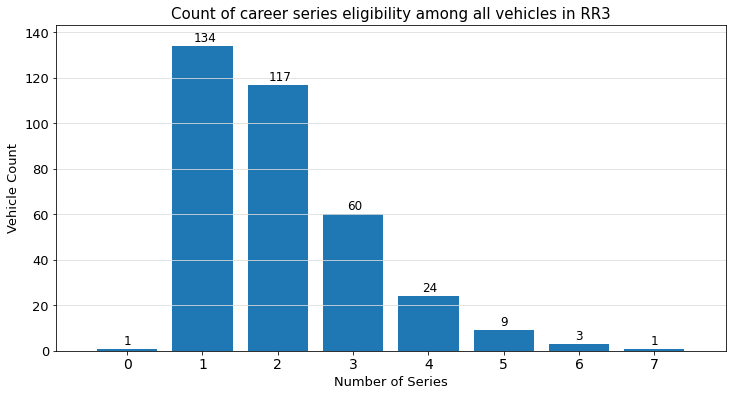

In [27]:
series_count = rr3_df.groupby('Series')['Model'].count()
plt.figure(figsize=(12,6))
plt.bar(range(8), series_count)
plt.title('Count of career series eligibility among all vehicles in RR3', fontsize=15)
plt.xlabel('Number of Series', fontsize=13)
plt.ylabel('Vehicle Count', fontsize=13)
for i in range(len(series_count)):
    if series_count[i] >= 100:   plt.text(i-0.12, series_count[i]+2, series_count[i], fontsize=12)
    elif series_count[i] >= 10:   plt.text(i-0.08, series_count[i]+2, series_count[i], fontsize=12)
    else:   plt.text(i-0.05, series_count[i]+2, series_count[i], fontsize=12)
plt.grid(axis='y', color='#dddddd')
plt.margins(0.07)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.show()

With many settings for full proper visualization in the figure, here's the **bar chart**!

We can claim that **more than 200** vehicles can be driven in only **1 or 2 career series**. Are they worth buying and upgrading, hmm? By the way, the rest looks like more preferable to own and upgrade, though. Ah, if you ever wonder which vehicle has **7 different career series** for driving, check my 1st part!

By the way, it is so bizarre that one vehicle was set to **not have any career series**! Again, is this an error?

In [28]:
rr3_df[rr3_df['Series'] == 0]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Availability,Exclusive Events,In Main Career
141,Formula 1,F1 Academy Car,110.3,306,2.15,18.3,3.0,R,MR,0,0 Mdollar,180,0.0,True,False,False


Oh, actually not! Although **F1 Academy Car** is free to get, you cannot drive it in any career series, except **the daily races** in the F1 hub menu! Right then, the game urges you to buy an F1 vehicle to continue further in the special events, championships and invitational events once you accumulated the enough amount of M$.

If you spotted this strangeness in the analysis a few steps above but don't know why, now you've got it!

## **OK, folks! That's enough for 2nd part of my Real Racing 3 data analysis!**

**I believe we have gained more knowledge on vehicles available in this game and hope that you enjoyed a lot! I promise that there will be lots of visualizations through my analyses in the next part. You know any graph could explain a thousand words than the statements here, right?** 

### **Stay tuned and as always, keep racing!**